In [2]:
import numpy as np
from moonlight import *
import matplotlib.pyplot as plt

import pandas as pd
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
data_path = "bikes.csv"
df = pd.read_csv(data_path)

In [4]:
df.iloc[0]

ID                                                           2
NAME                  Harbour Town - Docklands Dve - Docklands
TERMINALNAME                                             60000
NBBIKES                                                     10
NBEMPTYDOCKS                                                11
RUNDATE                                         20170422134506
INSTALLED                                                 True
TEMPORARY                                                False
LOCKED                                                   False
LASTCOMMWITHSERVER                               1492832566010
LATESTUPDATETIME                               1492832565029.0
REMOVALDATE                                                NaN
INSTALLDATE                                    1313724600000.0
LAT                                                 -37.814022
LONG                                                144.939521
LOCATION                              (-37.814022, 144.

In [5]:
# filter by date
specific_date = "20170422" # April 22nd, 2017
df_day = df[df["RUNDATE"].apply(lambda date: str(date).startswith(specific_date))]

In [6]:
def extract_seconds(int_date: int):
    date = str(int_date)
    hour = int(date[8:10])
    minutes = int(date[10:12])
    seconds = int(date[12:])
    return seconds + minutes * 60 + hour * 3600

In [7]:
def extract_seconds(int_date: int):
    date = str(int_date)
    hour = int(date[8:10])
    minutes = int(date[10:12])
    seconds = int(date[12:])
    return seconds + minutes * 60 + hour * 3600

df_day["ABS_TIME"] = df_day["RUNDATE"].apply(lambda date: extract_seconds(date))

/tmp/ipykernel_19775/3140256704.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day["ABS_TIME"] = df_day["RUNDATE"].apply(lambda date: extract_seconds(date))


In [9]:
def extract_from_df(df: pd.DataFrame, name: str):
    location = df[df["NAME"] == name]
    row = location.iloc[0]
    coordinates = row["LAT"], row["LONG"]
    traces = location.apply(lambda row: row["NBBIKES"], axis = 1)
    values = traces.values
    times = row["ABS_TIME"]
    return (coordinates, values, times)
    

coords, values, times = extract_from_df(df_day, "Harbour Town - Docklands Dve - Docklands")
# values

In [10]:
names = df_day["NAME"].unique()

In [11]:
def show_locations_map(coords: [(float, float)]):
    for lat,long in coords:
        plt.scatter(lat, long)

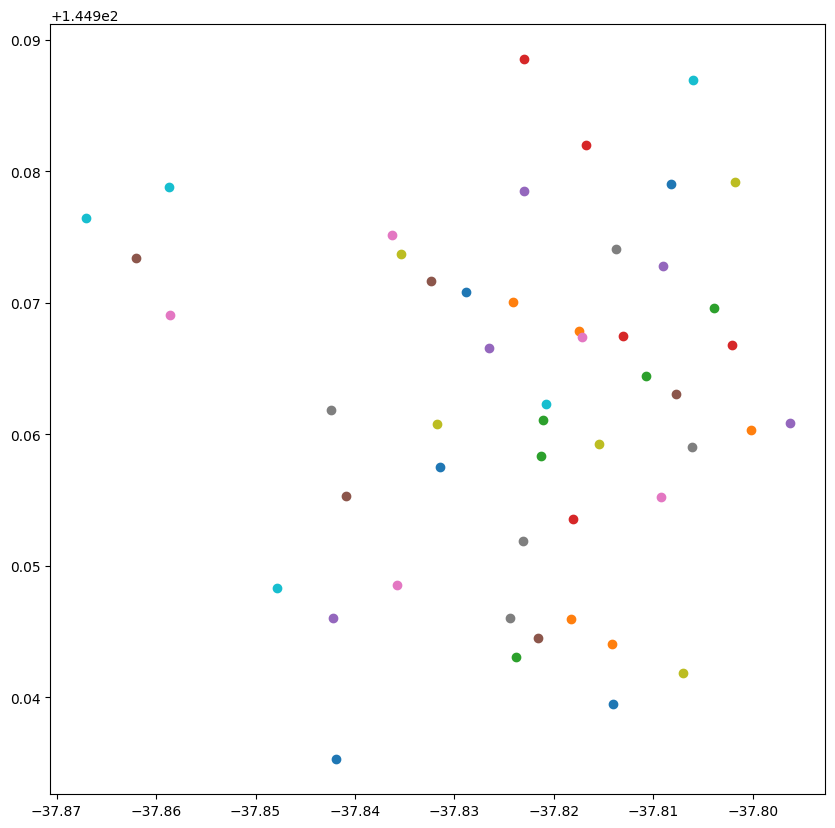

In [12]:
for name in names:
    coords, values, times = extract_from_df(df_day, name)
    show_locations_map([coords])

In [19]:
from location import LocationDatabase
locationDb = LocationDatabase()
locationDb.generate_from_df(df_day)
graph = locationDb.generate_graph()

In [22]:
script = """
signal { int nBikes; int nBEmptyDocks; }
space { edges { real distance; } }
domain minmax;
formula good_service = everywhere(distance) [0, 500] (nBikes > 10);
"""
specification = ScriptLoader.loadFromText(script)
monitor = specification.getMonitor("good_service")
result = monitor.monitor([0], graph , locationDb.get_time(), locationDb.get_traces())

times = new double[]{0.0}
graph = new double[][][]{{{0.0, 0.0, 0.0}, {0.0, 1.0, 2521.3715003231723}, {0.0, 2.0, 2222.9916041060833}, {0.0, 3.0, 2460.3106915413946}, {0.0, 4.0, 2724.290640286659}, {0.0, 5.0, 2191.2934350988753}, {0.0, 6.0, 2480.624075549464}, {0.0, 7.0, 3713.2252534260874}, {0.0, 8.0, 3748.4829238796083}, {0.0, 9.0, 3828.3255545393704}, {0.0, 10.0, 3212.0357492611615}, {0.0, 11.0, 737.466605915492}, {0.0, 12.0, 1129.4520568674675}, {0.0, 13.0, 2738.6930751828813}, {0.0, 14.0, 2978.210623072924}, {0.0, 15.0, 3289.448591235693}, {0.0, 16.0, 2544.0552973176054}, {0.0, 17.0, 1293.4583933931779}, {0.0, 18.0, 803.7595851240637}, {0.0, 19.0, 2140.741518361856}, {0.0, 20.0, 3122.4959941021907}, {0.0, 21.0, 401.6635475771852}, {0.0, 22.0, 2055.8627624573273}, {0.0, 23.0, 1319.0685126977273}, {0.0, 24.0, 3177.124923834529}, {0.0, 25.0, 6102.304177770968}, {0.0, 26.0, 5586.5715867686085}, {0.0, 27.0, 1487.3041607738523}, {0.0, 28.0, 1747.43153785643}, {0.0, 29.0, 4270.712976634285

lat -37.867068 -37.79625
long 144.935296 144.988507


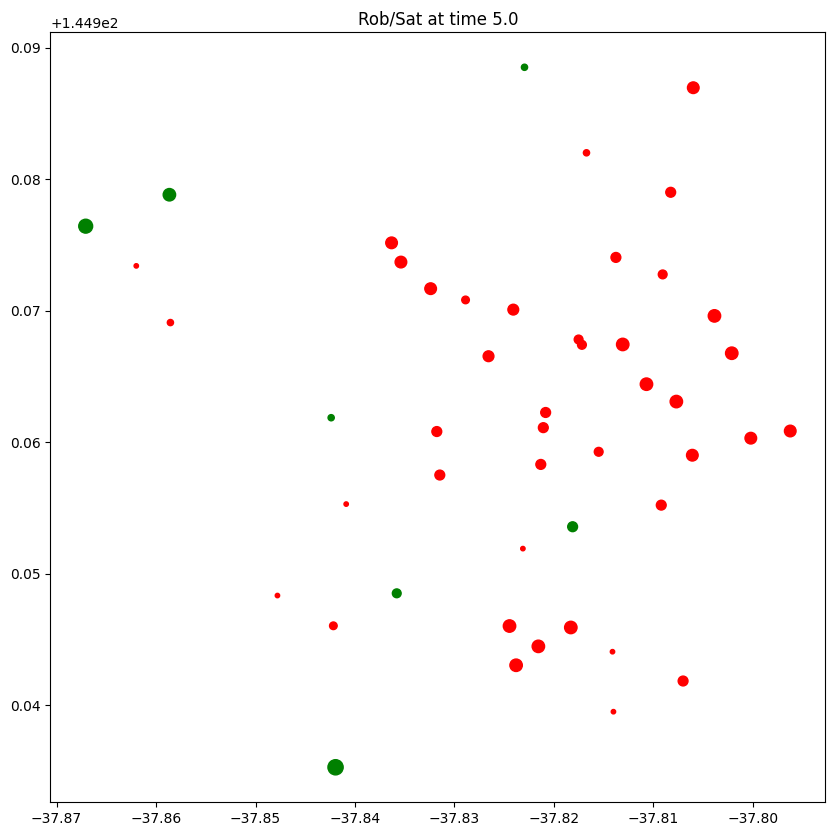

In [21]:
locationDb.plot_results(result, 0)